# **KSP 5.0 Selection Assignment**





In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Section 1: Calculating the Redshift of Galaxies

You are given the data for all the galaxies in the cluster in the file 'galaxy.csv'.

This includes the name of the galaxy, observed wavelength of the $H\alpha$ line $\lambda_{H\alpha}$, Right Ascension at J2000.0 and Declination and J2000.0 (You can read more about RA and Dec [here](https://en.wikipedia.org/wiki/Equatorial_coordinate_system))

In [6]:
galaxy_data = pd.read_csv('data/galaxy.csv')


Since the galaxies would have some radial velocities with respect to us, the wavelengths we observed would be [redshifted](https://en.wikipedia.org/wiki/Redshift) due to doppler effect.

Using the value of the Observed Wavelength of $H\alpha$ line (Rest Wavelength $\lambda_{H\alpha0} = 6562.8nm)$, calculate the redshift of the galaxies in our cluster.

Use this to find their radial velocities of the galaxies and plot it.

(Assume that the observed wavelength has been correscted for the motion of earth around sun, and motion of sun around the center of Milky Way. Put more simply, these are the wavelengths you would have observed if you were at rest at the center of Milky Way)

In [7]:
galaxy_data.head()
galaxy_data.dtypes
lambda_rest = 6562.8 # nm
C = 299792 # km/s

In [8]:
galaxy_data = galaxy_data.rename(columns={"Observed Wavelength of H-alpha":"lambda_obs", "Apparent Mag":"appar_mag", "RA J2000.0":"ra", "Dec J2000.0": "dec"})
galaxy_data.head()


,Name,lambda_obs,appar_mag,ra,dec
0,PGC1664006,6581.251999,12.465970,11 32 06.6,+22 07 31
1,PGC1620526,6602.969899,13.975112,11 35 54.4,+20 13 20
2,PGC1597887,6588.264616,13.767743,11 39 08.9,+19 35 00
3,UGC06670,6592.589623,12.932077,11 42 29.4,+18 19 59
4,PGC1519757,6591.906247,11.195245,11 44 40.7,+16 53 59


In [9]:
galaxy_data["z"]  = ((galaxy_data["lambda_obs"] - lambda_rest) / (lambda_rest))
galaxy_data.head()

,Name,lambda_obs,appar_mag,ra,dec,z
0,PGC1664006,6581.251999,12.465970,11 32 06.6,+22 07 31,0.002812
1,PGC1620526,6602.969899,13.975112,11 35 54.4,+20 13 20,0.006121
2,PGC1597887,6588.264616,13.767743,11 39 08.9,+19 35 00,0.003880
3,UGC06670,6592.589623,12.932077,11 42 29.4,+18 19 59,0.004539
4,PGC1519757,6591.906247,11.195245,11 44 40.7,+16 53 59,0.004435


In [10]:
# checking range to approx. v_rad if u/c << 1
z_range = galaxy_data["z"].max() - galaxy_data["z"].min()
z_range


0.015461757713274748

In [11]:
galaxy_data["v_rad"] = galaxy_data["z"] * C
galaxy_data.head()

,Name,lambda_obs,appar_mag,ra,dec,z,v_rad
0,PGC1664006,6581.251999,12.465970,11 32 06.6,+22 07 31,0.002812,842.896562
1,PGC1620526,6602.969899,13.975112,11 35 54.4,+20 13 20,0.006121,1834.981159
2,PGC1597887,6588.264616,13.767743,11 39 08.9,+19 35 00,0.003880,1163.236443
3,UGC06670,6592.589623,12.932077,11 42 29.4,+18 19 59,0.004539,1360.804944
4,PGC1519757,6591.906247,11.195245,11 44 40.7,+16 53 59,0.004435,1329.587961


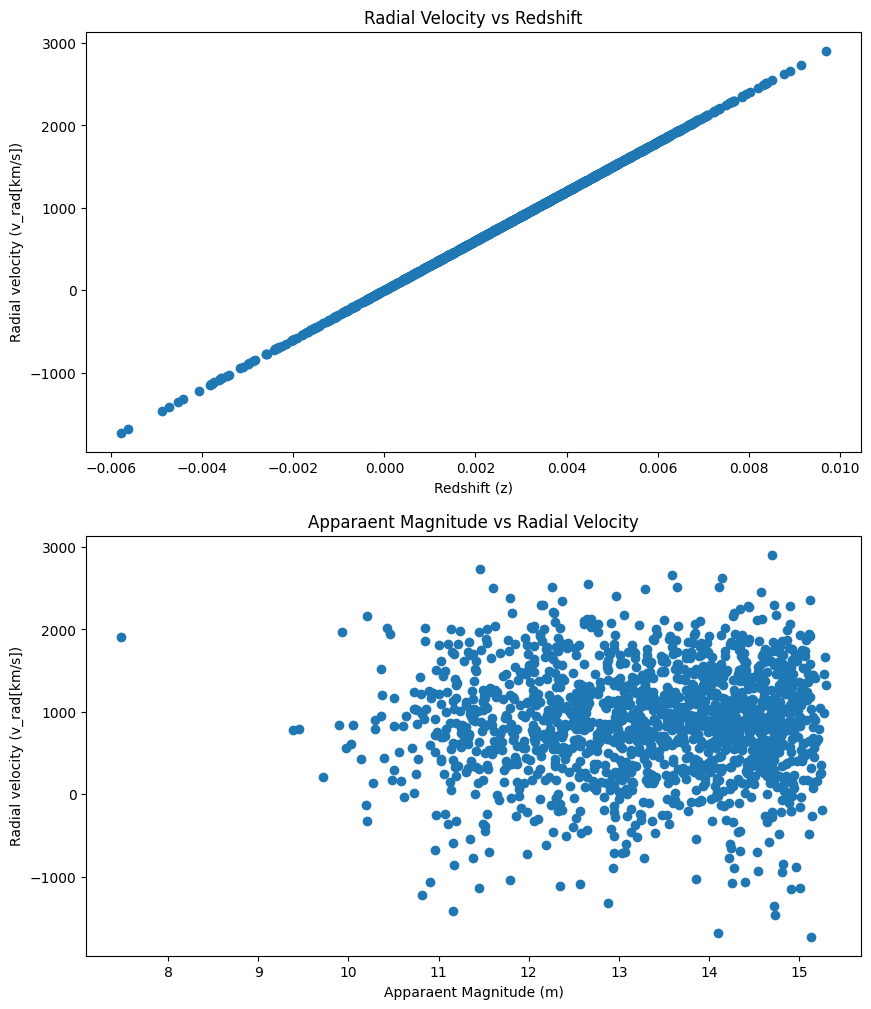

In [12]:
# galaxy_data["Name"].describe()
fig, axis = plt.subplots(2, figsize=(10, 12))

# z vs v_rad
axis[0].scatter(galaxy_data["z"], galaxy_data["v_rad"])
axis[0].set_title("Radial Velocity vs Redshift")
axis[0].set_xlabel("Redshift (z)")
axis[0].set_ylabel("Radial velocity (v_rad[km/s])")

# v_rad vs appar_mag
axis[1].scatter(galaxy_data["appar_mag"], galaxy_data["v_rad"])
axis[1].set_title("Apparaent Magnitude vs Radial Velocity")
axis[1].set_xlabel("Apparaent Magnitude (m)")
axis[1].set_ylabel("Radial velocity (v_rad[km/s])")

plt.show()

Using the data from galaxy.csv, answer the following questions.

For your convenience, the RA and Dec data has been converted from the format $a^\circ b^m c^s$ to $xx^\circ$ below


In [13]:
temp = galaxy_data['ra'].str.split(' ', expand=True)
galaxy_data['ra'] = temp[0].astype(float) + temp[1].astype(float) / 60 + temp[2].astype(float) / 3600
temp = galaxy_data['dec'].str.split(' ', expand=True)
galaxy_data['dec'] = temp[0].astype(float) + temp[1].astype(float) / 60 + temp[2].astype(float) / 3600


In [14]:
galaxy_data.head()

,Name,lambda_obs,appar_mag,ra,dec,z,v_rad
0,PGC1664006,6581.251999,12.465970,11.535167,22.125278,0.002812,842.896562
1,PGC1620526,6602.969899,13.975112,11.598444,20.222222,0.006121,1834.981159
2,PGC1597887,6588.264616,13.767743,11.652472,19.583333,0.003880,1163.236443
3,UGC06670,6592.589623,12.932077,11.708167,18.333056,0.004539,1360.804944
4,PGC1519757,6591.906247,11.195245,11.744639,16.899722,0.004435,1329.587961


***

###Q1.1. What is the approximate angular size of the galaxy cluster?



***

###Q1.2. Can you comment anything about the rotation of the galaxies around the center of the cluster.
HINT: You may find it useful to plot a scatter plot of RA and DEC with radial velocity as colormap.

With galaxies having decl cordinates of within (0,5) degree range has negative radial velocity galaxy with negative redshift values but with declination in between (10, 30) degree range has positive radial veloctiy and positive redshift with RA range (12,13) degrees

***

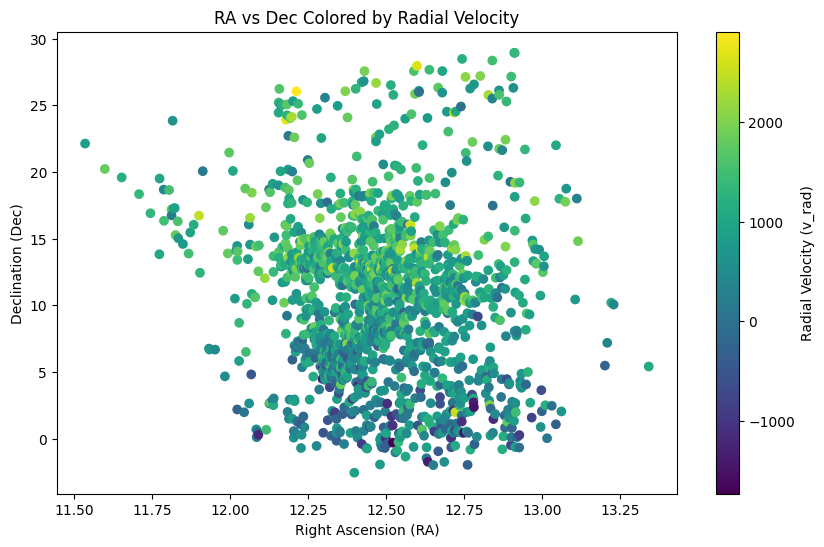

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(galaxy_data['ra'], galaxy_data['dec'], c=galaxy_data['v_rad'], cmap='viridis')
plt.colorbar(label='Radial Velocity (v_rad)')
plt.title('RA vs Dec Colored by Radial Velocity')
plt.xlabel('Right Ascension (RA)')
plt.ylabel('Declination (Dec)')
plt.show()

#Section 2: Calibrating Cepheids Data

NOTE: Although there are no prerequisities for this section, it relies a bit on knowledge about cepheids and their Period-Luminosity Relation. Necessary resource links have been provided wherever needed. You are strongly encouraged to use the internet to aid as a reference whenever needed.
***

The [Gaia Mission](https://en.wikipedia.org/wiki/Gaia_(spacecraft) aims at cataloging and create a precise three-dimensional map of astronomical objects throughout the Mily Way. It maps the motion of the stars, which encode the origin and subsequent evolution of the Milky Way. The spectrophotometric measurements provide detailed physical properties of all stars observed, characterizing their luminosity, effective temperature, gravity and elemental composition.





In [16]:
gaia_data = pd.read_csv('data/gaia.csv')
gaia_data.head()

,SOURCE_ID,mean apparent magnitude,time period,parallax
0,5313185367659966720,12.351363,11.206760,0.208351
1,5313250548085699712,12.718616,3.354941,0.196935
2,5256178232392037120,15.054192,2.844791,0.105986
3,6734367261085169408,12.106320,14.073005,0.134108
4,5846979704372502144,12.270158,23.142100,0.178353


Cepheids are a particular type of variable stars that pulsates radially, varying in both diameter and temperature. They **changes in brightness**, with a **well-defined stable period and amplitude**.

The file 'gaia.csv' includes data for about 5000 Cepheid Variable Stars in our own galaxy. In particular, the file contains the following data fields:
   
*   Unique ID of the Source Star
*   Parallax (in milli arcseconds) : You can read more about parallax [here](https://en.wikipedia.org/wiki/Stellar_parallax)
*   Mean **Apparent** Magnitude ($m$)
*   TIme period of Pulsations P(in days)



Classical Cepheids follow the [Period Luminosity Law](https://en.wikipedia.org/wiki/Period-luminosity_relation#The_relations), also commonly known as the Leavitt Law.

It basically states that there is an empirical relation between the pulsation period $(P)$ of a Cepheid Star and it's **Absolute Magnitude** ($M$) of the form -

#### $\begin{equation}M = \alpha \log_{10}(P \text{(in days)}) + \beta \end{equation}$
***

### Your aim is to verify Leavitt Law for cepheids using the given data, and find the values of $\alpha$ and $\beta$.

You may find it helpful to use the function 'poly_fit' in numpy for this.

In [17]:
# data cleaning
gaia_data = gaia_data.rename(columns={"mean apparent magnitude":"appar_mag", "time period":"period", "parallax":"parallax"})

In [18]:
gaia_data["parallax"] = gaia_data["parallax"] / 1000 # in arcseconds

In [19]:
# computing Absolute magnitudes
gaia_data["abs_mag"] = (gaia_data["appar_mag"] + 5 - (5 * np.log10(1/np.abs(gaia_data["parallax"]))))

In [20]:
gaia_data.head()

,SOURCE_ID,appar_mag,period,parallax,abs_mag
0,5313185367659966720,12.351363,11.206760,0.000208,-1.054659
1,5313250548085699712,12.718616,3.354941,0.000197,-0.809764
2,5256178232392037120,15.054192,2.844791,0.000106,0.180430
3,6734367261085169408,12.106320,14.073005,0.000134,-2.256403
4,5846979704372502144,12.270158,23.142100,0.000178,-1.473439


In [21]:
gaia_data["log_10(P)"] = np.log10(gaia_data["period"])
gaia_data.head()

,SOURCE_ID,appar_mag,period,parallax,abs_mag,log_10(P)
0,5313185367659966720,12.351363,11.206760,0.000208,-1.054659,1.049480
1,5313250548085699712,12.718616,3.354941,0.000197,-0.809764,0.525685
2,5256178232392037120,15.054192,2.844791,0.000106,0.180430,0.454050
3,6734367261085169408,12.106320,14.073005,0.000134,-2.256403,1.148387
4,5846979704372502144,12.270158,23.142100,0.000178,-1.473439,1.364403


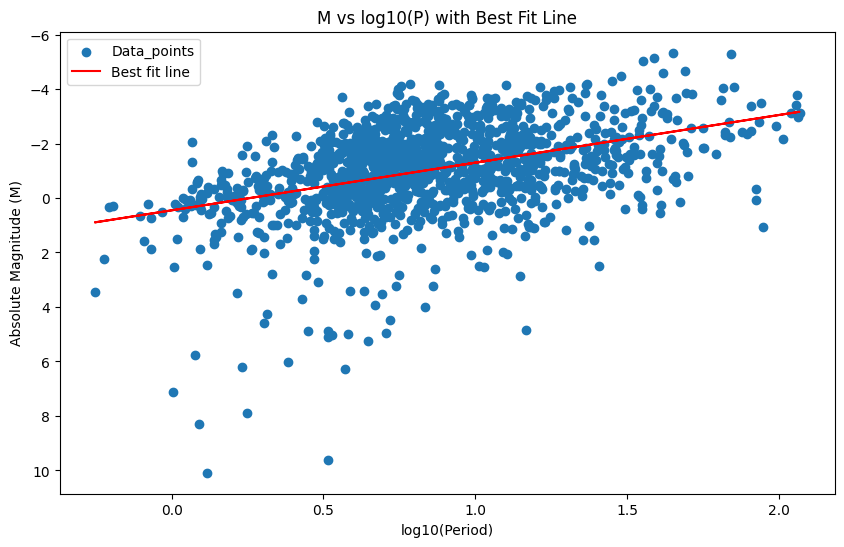

In [22]:
plt.figure(figsize=(10,6))

plt.scatter(gaia_data["log_10(P)"], gaia_data["abs_mag"], label="Data_points")

coeffs = np.polyfit(gaia_data["log_10(P)"], gaia_data["abs_mag"], 1)
best_fit  = (coeffs[0] * gaia_data["log_10(P)"]) + coeffs[1]

plt.plot(gaia_data["log_10(P)"], best_fit, color='red', label='Best fit line')

plt.title('M vs log10(P) with Best Fit Line')
plt.xlabel('log10(Period)')
plt.ylabel('Absolute Magnitude (M)')
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis because higher magnitudes correspond to fainter stars
plt.show()



In [23]:
# Get the values of alpha and beta
print(f"Slope (alpha): {coeffs[0]:.3f}")
print(f"Intercept (beta): {coeffs[1]:.3f}")

Slope (alpha): -1.750
Intercept (beta): 0.453


***
### Some useful information about the Magnitude system

The brightness of a star as seen by some observer is dependent on the observer's distance from the star as well as the intrinsic brightness of the star (ignoring any absorption in the intervening space).

In astronomy, brightness of a star, as seen by some observer, is measured in terms of its **apparent magnitude ($m$)**. For two stars (1 and 2) with fluxes $f_1$ and $f_2$ respectively, their apparent magnitudes $m_1$ and $m_2$ are related by:

$m_1 - m_2 = 2.5 \log_{10} \left( \frac{f_1}{f_2} \right)$

**Absolute magnitude ($M$)** of any star is its apparent magnitude if the star was exactly 10 parsecs away from the observer. Thus, $M$ only depends on the intrinsic brightness of the star.

***


# Section 3: Getting the distances to our galaxies

Now that we have our period-luminosity relation, we can observe cepheids in the galaxies in our cluster and use this to get the distances to our galaxies. (Yes, this is possible! Hubble Telescope actually observed Cepheids in the galaxies in Virgo Cluster)


For this, you have been given the data file 'cepheid.csv' which contains the following data fields:
*   Unique ID of the Cepheid
*   Name of the Galaxy to which it belongs
*   Mean Apparent Magnitude (m)
*   Time Period of Pulsation (in days)

In [24]:
#your code here
cepheid_data = pd.read_csv('data/cepheid.csv')
cepheid_data.head()

,Cepheid ID,Galaxy_ID,Period,Apparent Magnitude
0,XYZ688132,NGC4436,56.209508,4.395283
1,XYZ819204,NGC4379,5.726730,30.222261
2,XYZ589831,PGC039619,8.130369,30.060146
3,XYZ327693,PGC043108,3.615739,30.326899
4,XYZ688142,NGC4621,5.612137,30.468379


In [25]:
cepheid_data = cepheid_data.rename(columns={"Period": "period", "Apparent Magnitude": "appar_mag"})

In [26]:
cepheid_data["abs_mag"] = ((-1.75) * np.log10(gaia_data["period"]) + 0.453)


In [27]:
cepheid_data.head()

,Cepheid ID,Galaxy_ID,period,appar_mag,abs_mag
0,XYZ688132,NGC4436,56.209508,4.395283,-1.383590
1,XYZ819204,NGC4379,5.726730,30.222261,-0.466949
2,XYZ589831,PGC039619,8.130369,30.060146,-0.341588
3,XYZ327693,PGC043108,3.615739,30.326899,-1.556677
4,XYZ688142,NGC4621,5.612137,30.468379,-1.934705


In [28]:
cepheid_data["distance(pc)"] = 10**((cepheid_data["appar_mag"] - cepheid_data["abs_mag"] + 5)/5)
cepheid_data["distance(pc)"] = np.abs(cepheid_data["distance(pc)"])

In [29]:
cepheid_data.head()

,Cepheid ID,Galaxy_ID,period,appar_mag,abs_mag,distance(pc)
0,XYZ688132,NGC4436,56.209508,4.395283,-1.383590,1.431445e+02
1,XYZ819204,NGC4379,5.726730,30.222261,-0.466949,1.373542e+07
2,XYZ589831,PGC039619,8.130369,30.060146,-0.341588,1.203225e+07
3,XYZ327693,PGC043108,3.615739,30.326899,-1.556677,2.380757e+07
4,XYZ688142,NGC4621,5.612137,30.468379,-1.934705,3.024244e+07


In [47]:
cepheid_data.dtypes

Cepheid ID       object
Galaxy_ID        object
period          float64
appar_mag       float64
abs_mag         float64
distance(pc)    float64
dtype: object

In [48]:
cepheid_data["Galaxy_ID"].describe()

count                        5000
unique                       1470
top       SDSSJ123340.31+124413.5
freq                           10
Name: Galaxy_ID, dtype: object

In [49]:
group_galaxy_dist = cepheid_data.groupby("Galaxy_ID")["distance(pc)"].mean()
group_galaxy_dist.head()

Galaxy_ID
2MASXJ12194916+0511061             NaN
2MASXJ12362919+1818022    2.697928e+07
AGC213178                          NaN
AGC215145                 1.505983e+07
AGC215716                          NaN
Name: distance(pc), dtype: float64

In [50]:
group_galaxy_dist.dropna()

Galaxy_ID
2MASXJ12362919+1818022    2.697928e+07
AGC215145                 1.505983e+07
AGC219539                 2.591525e+07
AGC219541                 1.499563e+07
AGC219628                 2.072073e+07
                              ...     
UGCA298                   1.293924e+07
UGCA379                   4.226750e+07
VCC565                    2.194956e+07
VLSB-B                    2.196272e+07
[SDV2005]230              1.571928e+07
Name: distance(pc), Length: 903, dtype: float64

Use the Period-Luminosity Law derived in Section-2 and the above data to find an estimate for the distance to each galaxy in the cluster.

Make sure to handle outliers in the above data. The data may contain some cepheids that actually DO NOT belong to the given galaxy, but it just seems to us that this is the case since they fall along the same line of sight.
***

# Section 4: Getting the Hubble's Constant

The famous [Hubble's Law](https://en.wikipedia.org/wiki/Hubble%27s_law) is the observation that galaxies are moving away from Earth at speeds proportional to their distance.

$v = H_0 d$

where $H_0$ is the proportionalaity constant, also known as the Hubble's Constant.

Now that we have an estimate for the radial velocities and distance to the galaxies in our cluster, we need to find an estimate of the Hubble Constant (H).

Fit gaussians on your velocity and distance data and report the mean and standard deviation of the same. Also plot the histograms and the fitted gaussian.

In [51]:
group_galaxy_dist = group_galaxy_dist.dropna()
group_galaxy_dist = group_galaxy_dist.to_frame("Avg_dist")
group_galaxy_dist.head()

,Avg_dist
Galaxy_ID,
2MASXJ12362919+1818022,2.697928e+07
AGC215145,1.505983e+07
AGC219539,2.591525e+07
AGC219541,1.499563e+07
AGC219628,2.072073e+07


In [68]:
# your code here
combined_data = group_galaxy_dist.merge(galaxy_data, left_on='Galaxy_ID', right_on='Name', how='inner')
combined_data.head()


,Avg_dist,Name,lambda_obs,appar_mag,ra,dec,z,v_rad
0,2.697928e+07,2MASXJ12362919+1818022,6583.640781,10.634989,12.608111,18.300278,0.003176,952.017344
1,1.505983e+07,AGC215145,6590.726550,13.545558,11.903472,12.435000,0.004255,1275.698819
2,2.591525e+07,AGC219539,6566.956944,13.343852,11.812500,16.739722,0.000633,189.891300
3,1.499563e+07,AGC219541,6582.637324,13.393635,11.822694,17.290000,0.003023,906.178913
4,2.072073e+07,AGC219628,6571.730717,14.976533,11.787222,18.674444,0.001361,407.959632


In [69]:
combined_data.set_index("Name", inplace=True)
combined_data.index.rename("Galaxy_ID", inplace=True)
combined_data.shape

(903, 7)

In [70]:
combined_data.head()

,Avg_dist,lambda_obs,appar_mag,ra,dec,z,v_rad
Galaxy_ID,,,,,,,
2MASXJ12362919+1818022,2.697928e+07,6583.640781,10.634989,12.608111,18.300278,0.003176,952.017344
AGC215145,1.505983e+07,6590.726550,13.545558,11.903472,12.435000,0.004255,1275.698819
AGC219539,2.591525e+07,6566.956944,13.343852,11.812500,16.739722,0.000633,189.891300
AGC219541,1.499563e+07,6582.637324,13.393635,11.822694,17.290000,0.003023,906.178913
AGC219628,2.072073e+07,6571.730717,14.976533,11.787222,18.674444,0.001361,407.959632


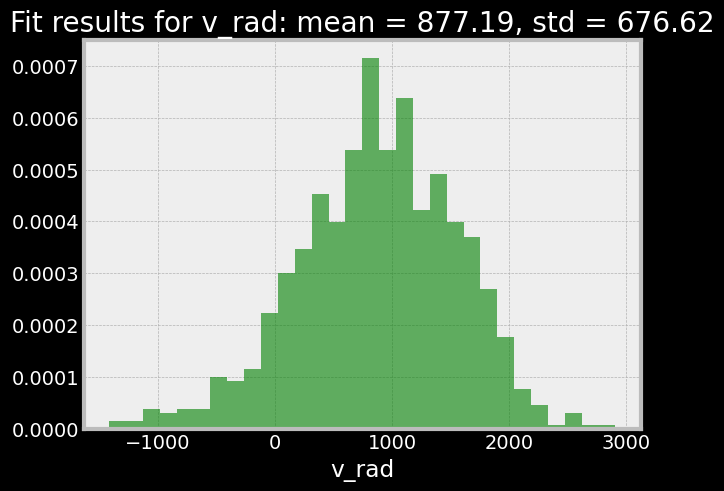

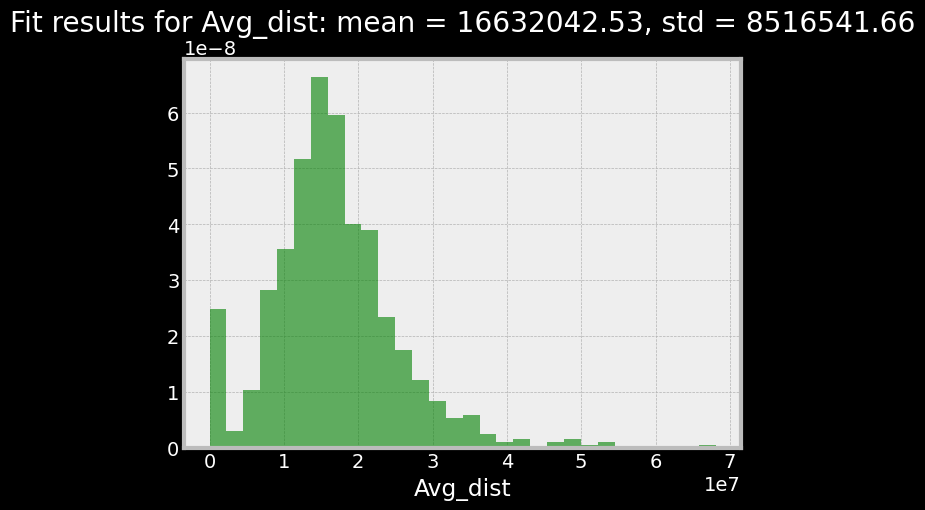

In [82]:
plt.style.use("bmh")
for column_name, column_data in [("v_rad", combined_data["v_rad"]), ("Avg_dist", combined_data["Avg_dist"])]:
    mu, std = norm.fit(column_data)

    # Plot the histogram
    plt.hist(column_data, bins=30, density=True, alpha=0.6, color='g')

    # Plot the PDF
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    # plt.plot(x, p, 'k', linewidth=2)

    # Set the title and x-axis label
    title = f"Fit results for {column_name}: mean = {mu:.2f}, std = {std:.2f}"
    plt.title(title)
    plt.xlabel(column_name)

    plt.show()

Using the values obtained in the previous part, report your value of $H$ along with the error margins.

***

#### Q4.1 Compare the value of $H$ that you got from the standard $H_0$ commonly accepted today. The estimate that you got - is it the same (within error margins), higher or lower than the value of $H_0$.

\< Your answer here \>

***

#### Q4.2 What might be the reason behind this difference in values

\< Your answer here \>

***

# Section 5 : Dark Matter

Dark matter is a component of the universe whose presence is discerned from its gravitational attraction rather than its luminosity.

***

#### Q5.1 ESTIMATE the total mass of the Galaxy Cluster. This includes mass due to visible matter as well as dark matter.

HINT: The [Virial Theorem](https://phys.libretexts.org/Bookshelves/Classical_Mechanics/Variational_Principles_in_Classical_Mechanics_%28Cline%29/02%3A_Review_of_Newtonian_Mechanics/2.11%3A_Virial_Theorem) provides a general equation that relates the average over time of the total kinetic energy of a stable system of discrete particles, bound by a conservative force
 $$ \left<KE\right> = -\frac{1}{2} \left<PE\right> $$

\< Your Answer here \>


In [11]:
# your code here


***

#### Q5.2 ESTIMATE the visible mass in the galaxy cluster. Use the Mass - Luminosity Relation for Main-Sequence Stars, assuming that it holds well for galaxies too. You may use the Milky Way as a reference.

Absolute Magnitude of Milky Way $ \approx -21 mag$

Visible mass of Milky Way $\approx 2 \times 10 ^ {11} M_{sun}$

\< Your answer here \>

In [12]:
# your code here

***

#### Q5.3 What is the fraction of the total mass of the galaxy cluster that is actually in the form of Dark Matter

\< Your answer here \>

***